<a href="https://colab.research.google.com/github/lucatombesi99/Outlier_detection/blob/main/Outlier_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
datase=pd.read_csv("/content/drive/MyDrive/proj_dataQuality/house.csv")
datase

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,70,RL,60.000000,7200,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,112,0,0,0,0,8,2009,WD,Normal
1,60,RL,69.331454,18450,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,265,0,0,0,0,0,8,2007,WD,Abnorml
2,70,RM,68.000000,9928,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,28,0,0,0,0,400,6,2009,WD,Normal
3,20,FV,60.000000,7200,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,121,0,0,0,0,0,8,2006,New,Partial
4,120,FV,35.000000,4274,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,116,0,0,0,0,0,11,2007,New,Partial
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,20,RL,75.000000,9000,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,8,2009,WD,Abnorml
497,60,RL,69.331454,16698,Pave,IR1,HLS,AllPub,CulDSac,Mod,...,193,0,0,0,0,0,6,2009,WD,Normal
498,60,RL,62.000000,7415,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,75,0,0,0,0,0,4,2008,WD,Normal
499,80,RL,69.331454,14115,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,48,0,0,0,0,0,6,2009,WD,Normal


In [ ]:
import sys
sys.path.append("/content/drive/MyDrive/proj_dataQuality")

In [ ]:
import dirty_accuracy as da

In [ ]:
cancer_injected=da.injection(datase,42,"cancer","Class")
cancer_injected

saved cancer-accuracy50%
saved cancer-accuracy60%
saved cancer-accuracy70%
saved cancer-accuracy80%
saved cancer-accuracy90%


[      MSSubClass MSZoning  LotFrontage        LotArea Street LotShape  \
 0    1302.412265       RL    60.000000    7200.000000   Pave      Reg   
 1      60.000000       RL   551.685850   18450.000000   Pave      IR1   
 2      70.000000       RM    68.000000    9928.000000   Pave      Reg   
 3      20.000000       FV    60.000000    7200.000000   Pave      Reg   
 4    -610.401121       FV -1215.463457    4274.000000   Pave      IR1   
 ..           ...      ...          ...            ...    ...      ...   
 496    20.000000       RL  1181.201753  186415.559544   Pave      Reg   
 497  1370.209503       RL    69.331454   16698.000000   Pave      IR1   
 498    60.000000       RL  -801.301243    7415.000000   Pave      IR1   
 499    80.000000       RL  -793.056189 -456244.323047   Pave      Reg   
 500    20.000000       RL    69.331454 -177354.079997   Pave      IR1   
 
     LandContour Utilities LotConfig LandSlope  ...  OpenPorchSF EnclosedPorch  \
 0           Lvl    AllPub  

In [ ]:
dataset = np.array(cancer_injected)
dataset.shape


(5, 683, 10)

In [ ]:
y_class=dataset[:,:,9]
x_class=dataset[:,:,:9]
x_class.shape,y_class.shape

((5, 683, 9), (5, 683))

In [ ]:
from sklearn.preprocessing import RobustScaler
scaled=[None]*len(dataset)
robust_scaler = RobustScaler()
for i in range(len(dataset)):
  robust_scaler.fit(dataset[i])
  scaled[i] = robust_scaler.transform(dataset[i])

scaled = np.asarray(scaled)
scaled.shape

(5, 683, 10)

In [ ]:
from sklearn.decomposition import PCA
principalDf=[None]*len(scaled)
for i in range(5):
  pca = PCA(n_components=7)
  principalComponents = pca.fit_transform(scaled[i])
  principalDf[i] = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3','principal component 4','principal component 5','principal component 6','principal component 7'])


In [ ]:
for i in range(5):
  print(i,"\t",len(y_class[y_class ==i]))

0 	 0
1 	 0
2 	 2220
3 	 0
4 	 1195


In [ ]:
x_class.shape, y_class.shape   #te tocca fa il reshape bro


((5, 683, 9), (5, 683))

# Primo block

# random forest

In [ ]:
from sklearn.model_selection import train_test_split
X_train=[None]*len(x_class)
X_test=[None]*len(x_class)
y_train=[None]*len(x_class)
y_test=[None]*len(x_class)
for i in range(len(x_class)):
  X_train[i], X_test[i], y_train[i], y_test[i] = train_test_split(x_class[i], y_class[i], test_size = 0.25, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
for i in range(len(X_train)):
  X_train[i] = sc.fit_transform(X_train[i])
  X_test[i] = sc.transform(X_test[i])


In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifiers=[None]*len(x_class)
for i in range(len(x_class)):
  classifiers[i]=RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
  classifiers[i].fit(X_train[i], y_train[i])

In [ ]:
y_pred=[None]*len(X_train)
for i in range(len(X_train)):
 y_pred[i] = classifiers[i].predict(X_test[i])

In [ ]:
  from sklearn.metrics import confusion_matrix
  for i in range(5):
    cm=confusion_matrix(y_test[i], y_pred[i])
    print(cm)

[[102   5]
 [ 21  43]]
[[101   6]
 [ 20  44]]
[[103   4]
 [ 14  50]]
[[103   4]
 [ 14  50]]
[[105   2]
 [ 11  53]]


In [ ]:
from sklearn.metrics import classification_report
for i in range(5):
  print("For classification report:")
  print(classification_report(y_test[i] , y_pred[i]))

For classification report:
              precision    recall  f1-score   support

         2.0       0.83      0.95      0.89       107
         4.0       0.90      0.67      0.77        64

    accuracy                           0.85       171
   macro avg       0.86      0.81      0.83       171
weighted avg       0.85      0.85      0.84       171

For classification report:
              precision    recall  f1-score   support

         2.0       0.83      0.94      0.89       107
         4.0       0.88      0.69      0.77        64

    accuracy                           0.85       171
   macro avg       0.86      0.82      0.83       171
weighted avg       0.85      0.85      0.84       171

For classification report:
              precision    recall  f1-score   support

         2.0       0.88      0.96      0.92       107
         4.0       0.93      0.78      0.85        64

    accuracy                           0.89       171
   macro avg       0.90      0.87      0.88    

# support vector machine

In [ ]:
from sklearn.model_selection import train_test_split
X_train=[None]*len(x_class)
X_test=[None]*len(x_class)
y_train=[None]*len(x_class)
y_test=[None]*len(x_class)
for i in range(len(x_class)):
  X_train[i], X_test[i], y_train[i], y_test[i] = train_test_split(x_class[i], y_class[i], test_size = 0.25, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
for i in range(len(X_train)):
  X_train[i] = sc.fit_transform(X_train[i])
  X_test[i] = sc.transform(X_test[i])

In [ ]:
from sklearn.svm import SVC

classifiers=[None]*len(x_class)
for i in range(len(x_class)):
  classifiers[i]=SVC()
  classifiers[i].fit(X_train[i], y_train[i])

In [ ]:
y_pred=[None]*len(X_train)
for i in range(len(X_train)):
 y_pred[i] = classifiers[i].predict(X_test[i])

In [ ]:
  from sklearn.metrics import confusion_matrix
  for i in range(5):
    cm=confusion_matrix(y_test[i], y_pred[i])
    print(cm)

[[105   2]
 [ 61   3]]
[[99  8]
 [55  9]]
[[104   3]
 [ 60   4]]
[[102   5]
 [ 44  20]]
[[99  8]
 [38 26]]


In [ ]:
from sklearn.metrics import classification_report
for i in range(5):
  print("For classification report:")
  print(classification_report(y_test[i] , y_pred[i]))

For classification report:
              precision    recall  f1-score   support

         2.0       0.63      0.98      0.77       107
         4.0       0.60      0.05      0.09        64

    accuracy                           0.63       171
   macro avg       0.62      0.51      0.43       171
weighted avg       0.62      0.63      0.51       171

For classification report:
              precision    recall  f1-score   support

         2.0       0.64      0.93      0.76       107
         4.0       0.53      0.14      0.22        64

    accuracy                           0.63       171
   macro avg       0.59      0.53      0.49       171
weighted avg       0.60      0.63      0.56       171

For classification report:
              precision    recall  f1-score   support

         2.0       0.63      0.97      0.77       107
         4.0       0.57      0.06      0.11        64

    accuracy                           0.63       171
   macro avg       0.60      0.52      0.44    

# Secondo block

# Outlier Factor

In [ ]:
dataframes=[None]*len(principalDf)
for i in range(len(principalDf)):
  dataframes[i] = pd.DataFrame(principalDf[i])

dataframes[1]

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7
0,-0.676264,1.298348,15.856436,3.915137,7.416817,-1.955095,-4.592960
1,-1.018220,0.046834,-9.786714,-0.321216,1.702680,-1.172001,-0.005440
2,-0.868298,2.436771,-0.952903,5.865943,-5.879044,-1.589407,-1.234986
3,-0.843469,0.123634,1.070098,-6.037202,7.412655,-3.697089,0.977033
4,-0.731695,-2.846780,-0.378917,-3.120771,-1.585623,-3.447342,1.800894
...,...,...,...,...,...,...,...
678,-1.016035,-1.184801,-10.899699,0.079570,2.523395,-3.625072,-1.690955
679,-0.935107,-0.413288,0.520029,3.853229,6.812976,-0.354758,1.432154
680,-0.279948,1.562382,1.421310,-8.064523,-1.957492,-1.713914,0.781570
681,39.024702,21.033110,-2.052703,4.877840,2.045206,1.450606,8.033627


In [ ]:
def LOF_outlier_detection(X):
    data = X
    # requires no missing value
    # select top 10 outliers
    from sklearn.neighbors import LocalOutlierFactor

    # fit the model for outlier detection (default)
    clf = LocalOutlierFactor(n_neighbors=3, contamination=0.5)

    clf.fit_predict(X)

    LOF_scores = clf.negative_outlier_factor_
    # Outliers tend to have a negative score far from -1

    #print(LOF_scores)

    non_outliers = X[LOF_scores >= -1.5] # outliers tend to have a score far from -1
    return non_outliers


dataset_fromLOF=dataframes
for i in range(len(dataframes)):
  dataset_fromLOF[i] = LOF_outlier_detection(dataframes[i])
  print(len(dataset_fromLOF[i]))

611
580
470
442
490


In [ ]:
data_temp=[None]*len(dataframes)
for i in range(len(dataframes)):
  data_temp[i]=np.array(dataframes[i])

dataset_from_lof=[]
for i in range(len(data_temp)):
  if(i not in LOF_outliers):
    dataset_from_lof.append(data_temp[i,:])

dataset_from_lof=np.array(dataset_from_lof)
dataset_from_lof.shape

prova=pd.DataFrame(dataset_from_lof)
prova.boxplot(figsize=(8,24))

NameError: ignored

# z-score

(683,)

In [ ]:
def ZSB(data,data2,threshold):
    # Robust Zscore as a function of median and median
    # mean absolute deviation (MAD) defined as
    # z-score = |x – median(x)| / mad(x)
    indexes=[]
    for i in range(10):
      mean = np.mean(data[:,i])
      sd = np.std(data[:,i])
      modified_z_scores = (data2[:,i] - mean) / sd
      for j in range(len(modified_z_scores)):
        if (abs(modified_z_scores[j])>threshold):
          indexes.append(j)

    final=[*set(indexes)]
    final.sort(reverse = True)
    for i in final:
      data=np.delete(data,i,axis=0)

    return data

z_outliers=[None]*5
for i in range(len(dataset)):
  z_outliers[i]=ZSB(dataset[i],scaled[i],1.9)
  print(z_outliers[i].shape)

(239, 10)
(239, 10)
(209, 10)
(213, 10)
(217, 10)


# Hierarchical clustering

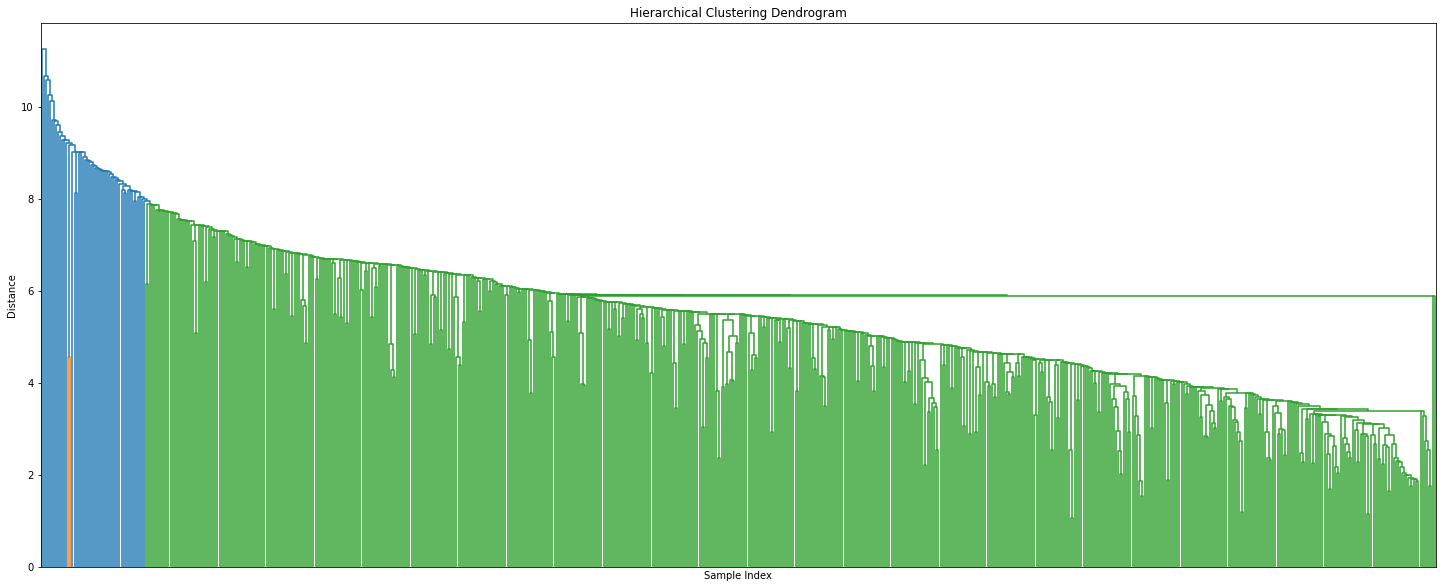

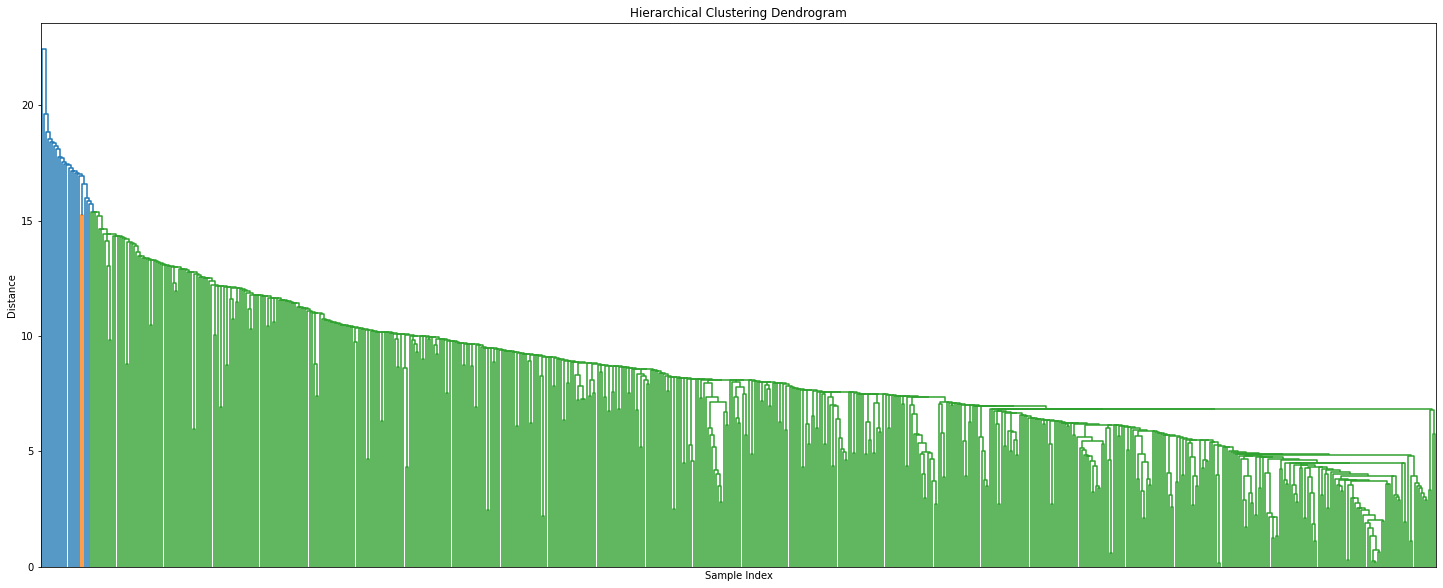

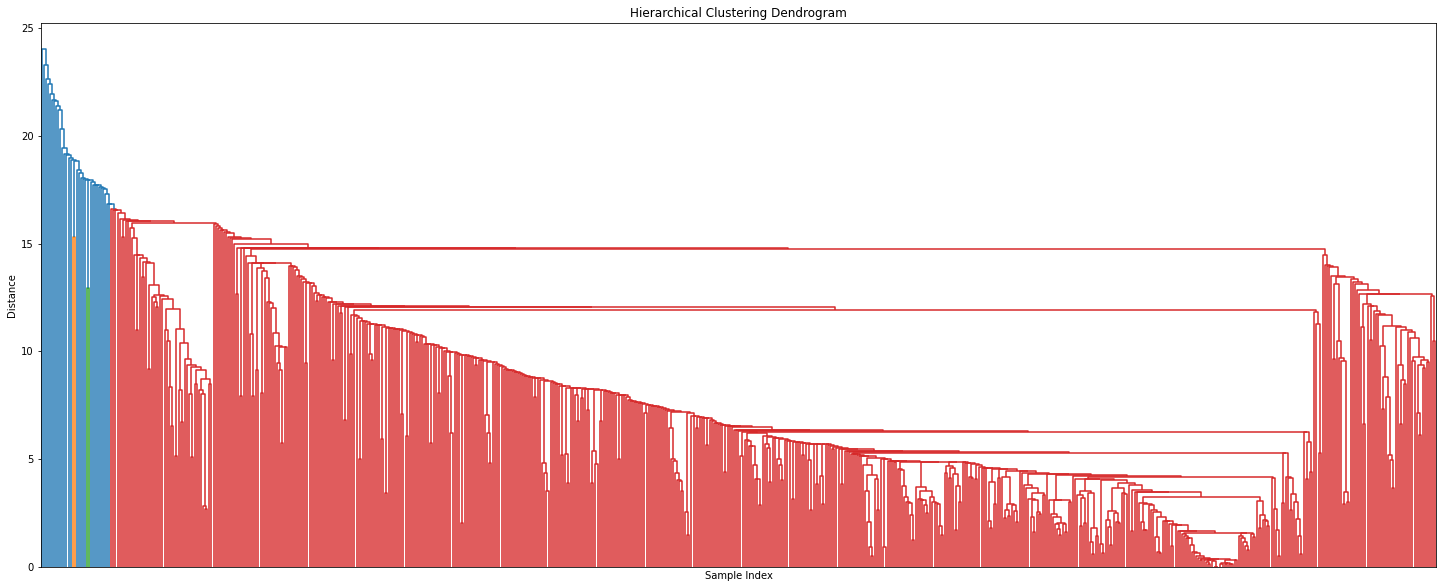

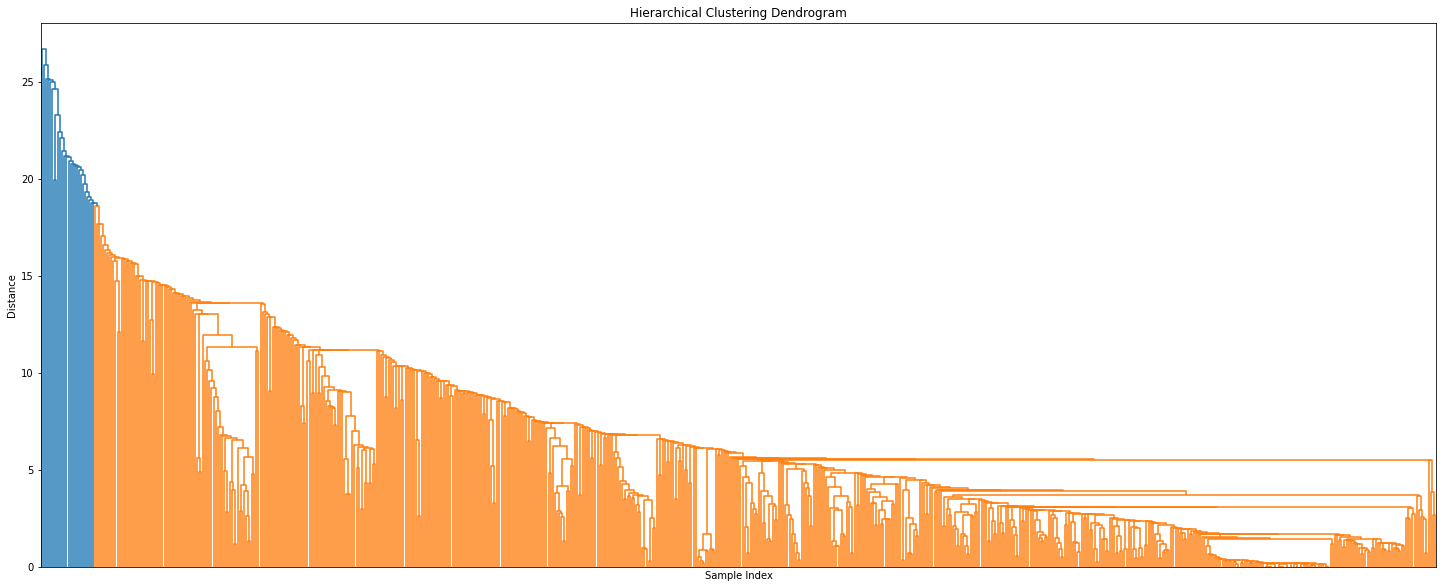

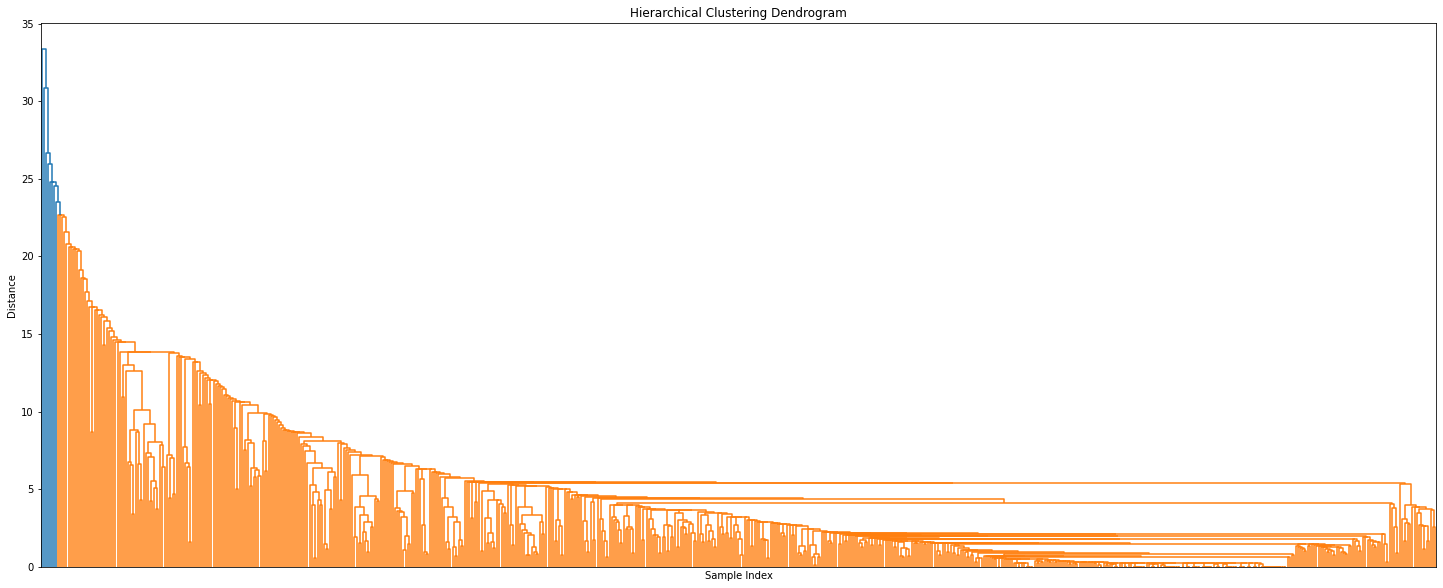

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster, inconsistent
import matplotlib.pyplot as plt

for i in range(len(principalDf)):
  Z = linkage(scaled[i], 'single')

  plt.figure(figsize=(25, 10))
  plt.title('Hierarchical Clustering Dendrogram')
  plt.xlabel('Sample Index')
  plt.ylabel('Distance')
  dendrogram(Z,
      leaf_rotation=90.,  # rotates the x axis labels
      leaf_font_size=8.,  # font size for the x axis labels
  )
  plt.xticks([])
  plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering

dataset_prova=[None]*len(principalDf)

for i in range(len(principalDf)):
  cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='single')
  results = cluster.fit_predict(principalDf[i])
  dataset_prova[i] = principalDf[i][results == 0]
  print(len(dataset_prova[i]))
  unique, counts = np.unique(results, return_counts=True)
  print(unique, counts)
  print()

681
[0 1 2] [681   1   1]

681
[0 1 2] [681   1   1]

681
[0 1 2] [681   1   1]

681
[0 1 2] [681   1   1]

681
[0 1 2] [681   1   1]



# IQR

In [ ]:
from sklearn.neighbors import NearestNeighbors

In [ ]:
data=scaled.copy()
for i in range(5):
  data[i]=pd.DataFrame(data[i])

675
677
629
558
479


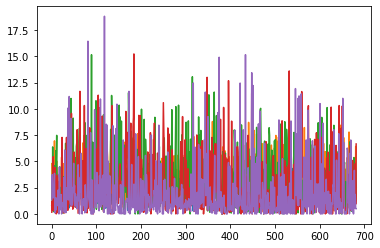

In [ ]:
outlier_values=[None]*5
for i in range(5):

  # instantiate model
  nbrs = NearestNeighbors(n_neighbors = 2)
  # fit model
  nbrs.fit(data[i])
  # distances and indexes of k-neaighbors from model outputs
  distances, indexes = nbrs.kneighbors(scaled[i])
  # plot mean of k-distances of each observation
  plt.plot(distances.mean(axis =1))

  # visually determine cutoff values > 0.25
  outlier_index = np.where(distances.mean(axis = 1) > 0.50)
  outlier_values[i] = data[i].iloc[outlier_index]
  print(len(outlier_values[i]))


In [ ]:
dataframes=[None]*len(dataset)
for i in range(len(dataset)):
  dataframes[i] = pd.DataFrame(scaled[i])


In [ ]:
dataframes[4].to_csv('provings.csv')

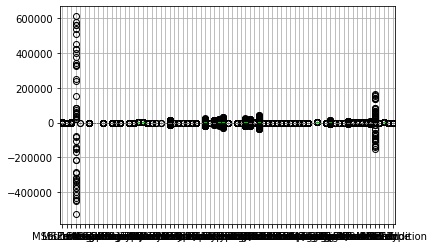

In [ ]:
data_red
dataframe = pd.DataFrame(data_red[4])



bp =dataframe.boxplot()

In [ ]:
data_mod = cancer_injected.copy()

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, RobustScaler

for j in range(5):
  data_types = data_mod[j].dtypes
  encoders = [None]*len(data_types)
  for i in range(len(data_types)):
    if data_types[i] == object:
      encoders[i] = LabelEncoder()
      data_mod[j].iloc[:,i] = encoders[i].fit_transform(data_mod[j].iloc[:,i])

In [ ]:
data_red = data_mod.copy()

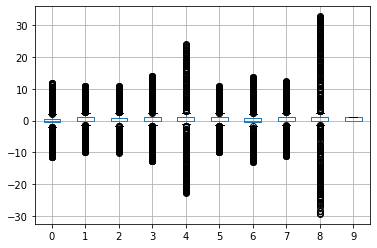

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

j=dataframes[1]
myFig = plt.figure();
bp =j.boxplot()
myFig.savefig("myName1.svg", format="svg")
